# Exemple simple de clustering et la courbe elbow

## Activité 1:
- Importer numpy, pandas, matplotlib.pyplot, seaborn
- Importer le fichier Mall_customers.csv et le stocker dans df
- Afficher le nombre de lignes et de colonnes
- Afficher les statistiques des variables
- Afficher le typage des variables
- Afficher les 10 première lignes de df

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info(), df.describe(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000,
 (200, 5))

## Activité 2:
- Renommer les variables "Annual Income (k$)" en 'Income' et 'Spending Score (1-100)' en 'Score'. Utiliser .rename() de pandas pour cela. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
- Afficher un pairplot selon le genre (Homme - Femme) https://seaborn.pydata.org/generated/seaborn.pairplot.html
- Que peut on dire sur la variable gender ? Semble t'elle pertinente pour notre segmentation?

In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Les données en détails avec "pairplots"

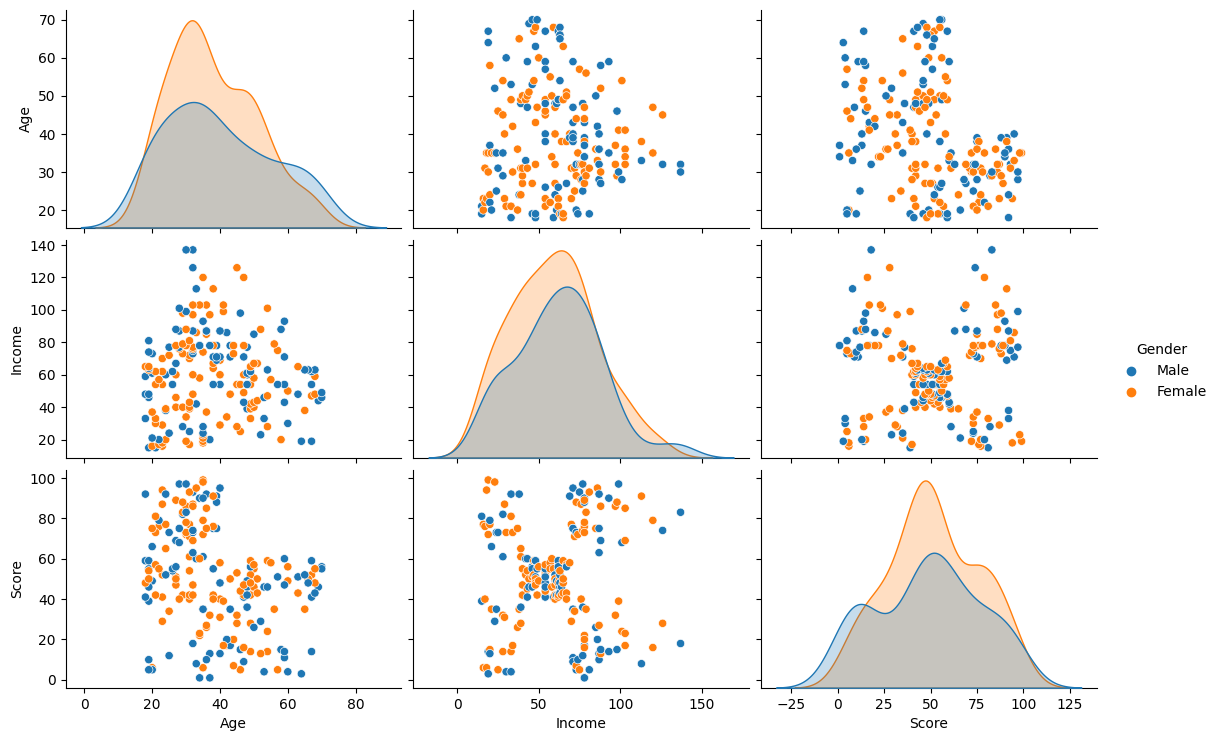

In [7]:
# Les pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Réponse: Le graphique ci-dessus montre que le sexe n'a pas de rapport direct avec la segmentation de la clientèle. 

C'est pourquoi nous pouvons laisser tomber et passer à d'autres caractéristiques (on utilisera le paramètre X).

## Activité 3   
- Importer Kmeans de sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Nous voulons réaliser plusieurs Kmeans afin d'utiliser ** Elbow** (la règle du coude selon sa forme !)  afin de définir le nombre de cluster. Réaliser 10 kmeans.

**N.B. :** : Elbow donne le nbr optimal des clusters

**L'inertie** (Inertia, ci-dessous) mesure la somme des carrés des distances entre chaque observation et le centroïde du cluster auquel il est assigné.

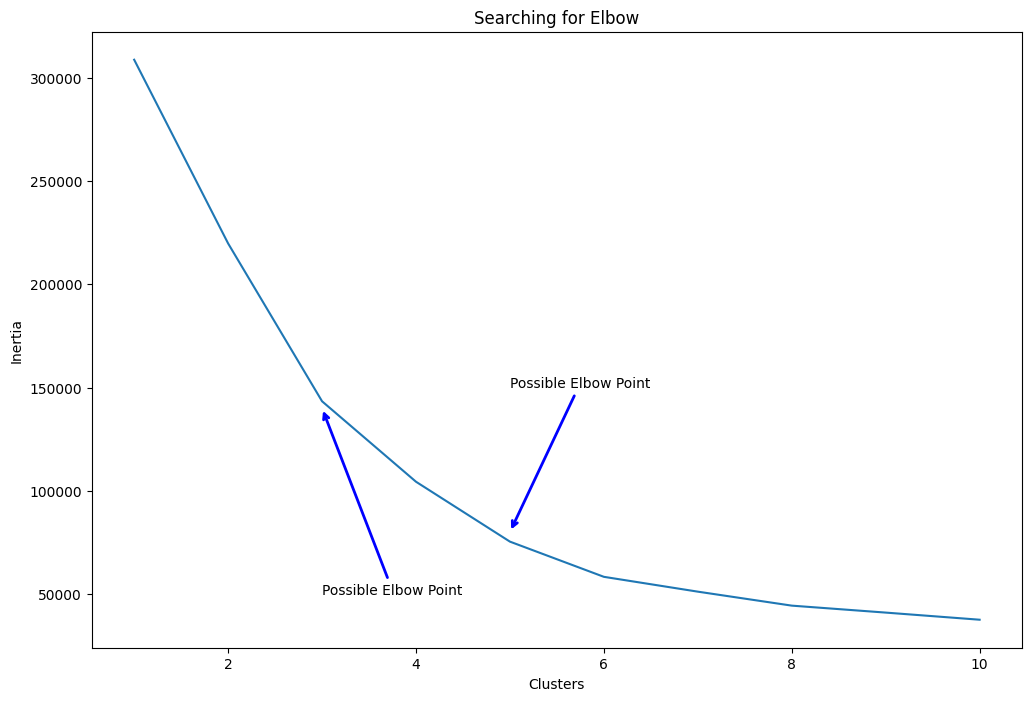

In [8]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()